In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/kaggle/input/uber-fares-dataset/uber.csv")

# View first few rows
print(df.head())

# Check shape
print("Rows and Columns:", df.shape)

# View column types
print(df.info())




   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [7]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())




Missing values per column:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [8]:
# Check duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [11]:
# Drop missing values
df = df.dropna()

# Remove negative and zero fares
df = df[df['fare_amount'] > 0]

# Remove suspicious passenger counts
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# Remove invalid coordinates (optional)
df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]

# Convert datetime column
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Reset index
df = df.reset_index(drop=True)


In [12]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199258 entries, 0 to 199257
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199258 non-null  int64              
 1   key                199258 non-null  object             
 2   fare_amount        199258 non-null  float64            
 3   pickup_datetime    199258 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199258 non-null  float64            
 5   pickup_latitude    199258 non-null  float64            
 6   dropoff_longitude  199258 non-null  float64            
 7   dropoff_latitude   199258 non-null  float64            
 8   passenger_count    199258 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.992580e+05,199258.000000,199258.000000,199258.000000,199258.000000,199258.000000,199258.000000
mean,2.771592e+07,11.369409,-72.504188,39.919180,-72.517755,39.925764,1.689453
std,1.601419e+07,9.905942,10.442191,6.127726,10.509248,6.198146,1.305390
min,1.000000e+00,0.010000,-93.824668,-74.015515,-737.916665,-74.015750,1.000000
25%,1.382642e+07,6.000000,-73.992064,40.734792,-73.991409,40.733827,1.000000
50%,2.775602e+07,8.500000,-73.981825,40.752582,-73.980094,40.753041,1.000000
75%,4.156007e+07,12.500000,-73.967162,40.767155,-73.963663,40.767995,2.000000
max,5.542357e+07,499.000000,40.808425,48.018760,40.831932,493.533332,6.000000


In [14]:
import numpy as np

# Descriptive stats for fare_amount
print("Fare Amount Statistics:")
print(df['fare_amount'].describe())

print("\nMean:", df['fare_amount'].mean())
print("Median:", df['fare_amount'].median())
print("Mode:", df['fare_amount'].mode()[0])
print("Standard Deviation:", df['fare_amount'].std())
print("Range:", df['fare_amount'].max() - df['fare_amount'].min())

# Q1, Q3 and IQR for outlier detection
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
print("\nInterquartile Range (IQR):", IQR)

# Detect outliers
outliers = df[(df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR))]
print("Number of Outliers in Fare Amount:", len(outliers))


Fare Amount Statistics:
count    199258.000000
mean         11.369409
std           9.905942
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

Mean: 11.369409107789899
Median: 8.5
Mode: 6.5
Standard Deviation: 9.905942026932864
Range: 498.99

Interquartile Range (IQR): 6.5
Number of Outliers in Fare Amount: 17120


In [13]:
# Save a copy of the CSV to the working directory
df.to_csv("/kaggle/working/uber_copy.csv", index=False)


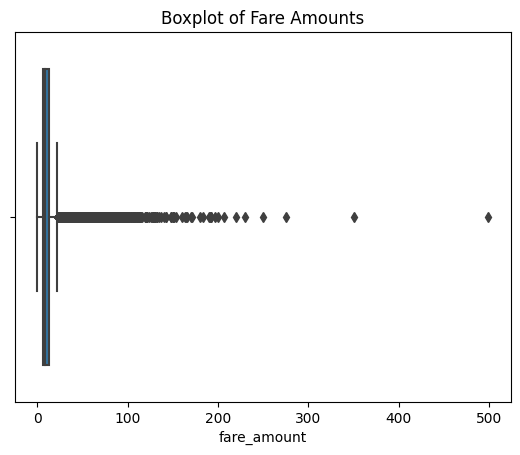

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='fare_amount')
plt.title("Boxplot of Fare Amounts")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


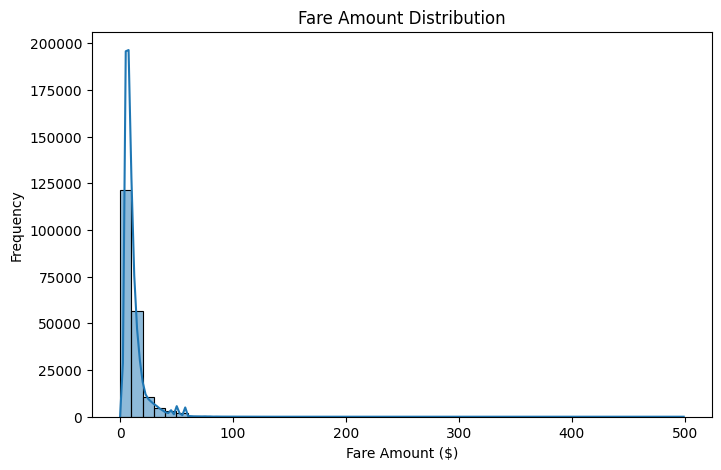

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()


In [17]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title("Fare vs. Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($)")
plt.show()


ValueError: Could not interpret value `trip_distance` for parameter `x`

In [18]:
print(df.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [20]:
import numpy as np

# Define Haversine function
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers. Use 6371 for km or 3956 for miles
    km = 6371 * c
    return km

# Apply it to your DataFrame
df['trip_distance'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)


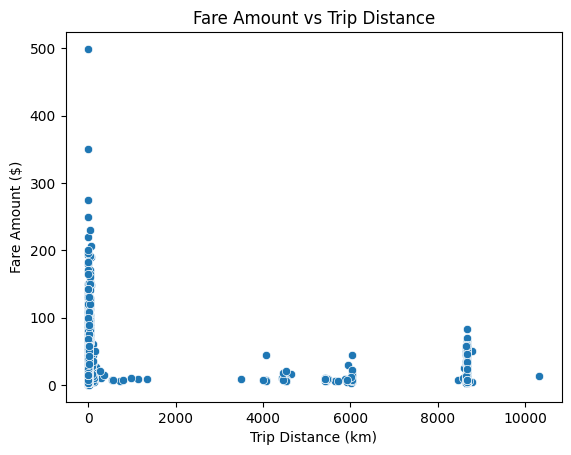

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()


In [22]:
df_cleaned = df[(df['trip_distance'] < 100) & (df['fare_amount'] < 200)]


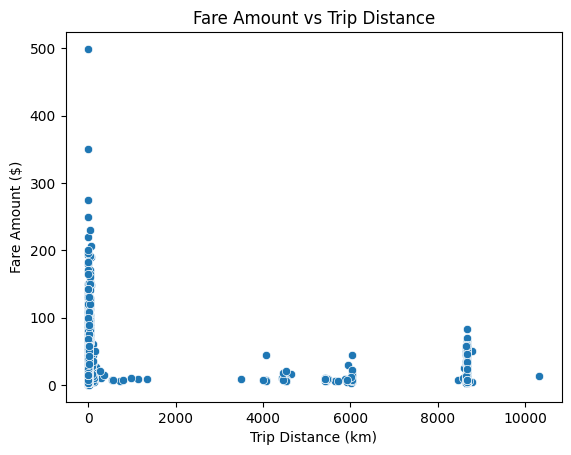

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()

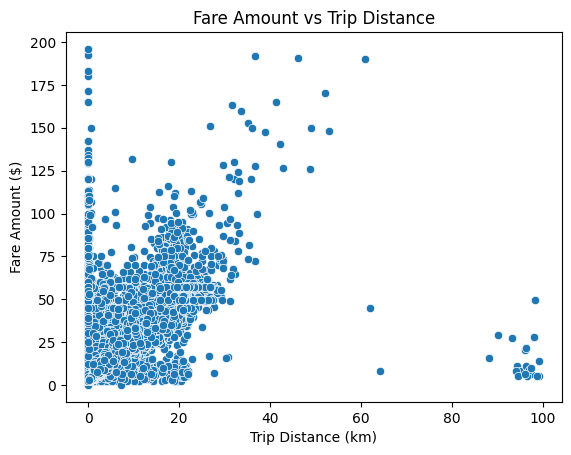

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out outliers for better visualization
df_cleaned = df[(df['trip_distance'] < 100) & (df['fare_amount'] < 200)]

# Plot using the cleaned DataFrame
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_cleaned)
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()


In [25]:
import pandas as pd

# Ensure datetime column is in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract hour from pickup time (0 = midnight, 23 = 11PM)
df['hour_of_day'] = df['pickup_datetime'].dt.hour


In [27]:
df_cleaned = df[(df['fare_amount'] < 200) & (df['fare_amount'] > 0)]


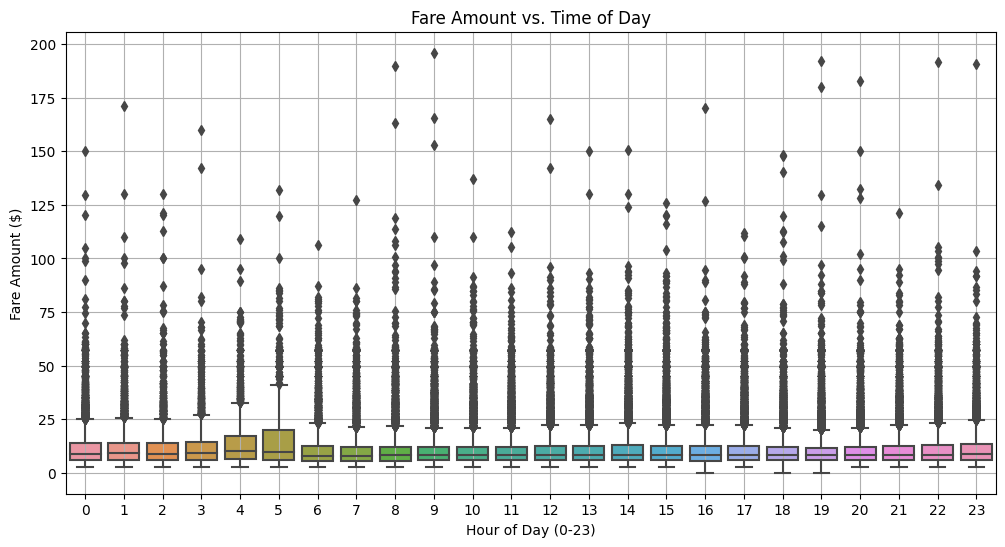

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to show fare distribution per hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour_of_day', y='fare_amount', data=df_cleaned)
plt.title("Fare Amount vs. Time of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Fare Amount ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [29]:
# Group by hour and calculate the mean fare
fare_by_hour = df_cleaned.groupby('hour_of_day')['fare_amount'].mean().reset_index()


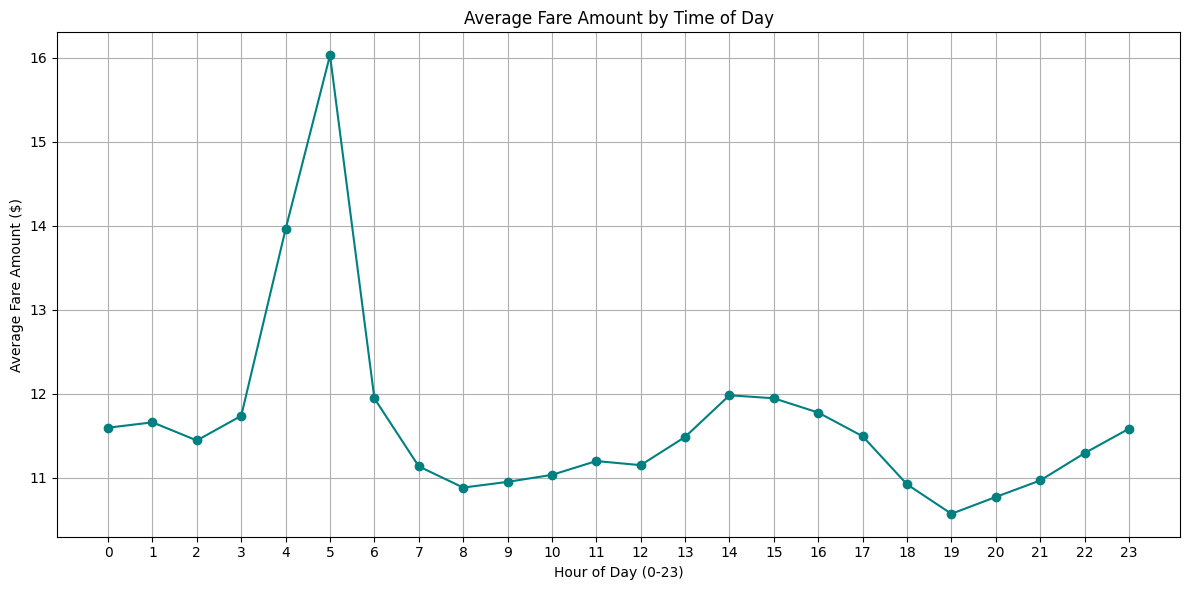

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(fare_by_hour['hour_of_day'], fare_by_hour['fare_amount'], marker='o', linestyle='-', color='teal')

plt.title("Average Fare Amount by Time of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Fare Amount ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


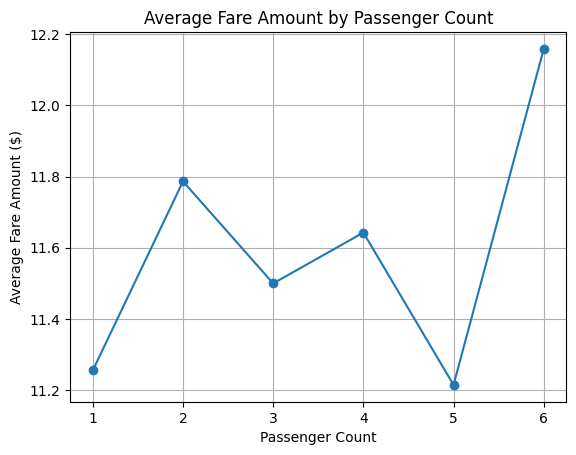

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by passenger count and get average fare
fare_by_passenger = df.groupby('passenger_count')['fare_amount'].mean().reset_index()

# Line plot
plt.plot(fare_by_passenger['passenger_count'], fare_by_passenger['fare_amount'], marker='o')
plt.title("Average Fare Amount by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare Amount ($)")
plt.grid(True)
plt.show()


In [33]:
df['passenger_count'].value_counts().sort_index()


passenger_count
1    138405
2     29424
3      8878
4      4276
5     14004
6      4271
Name: count, dtype: int64

In [37]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
# Monday = 0, Sunday = 6
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['day_name'] = df['pickup_datetime'].dt.day_name()
avg_fare_by_day = df.groupby('day_name')['fare_amount'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])



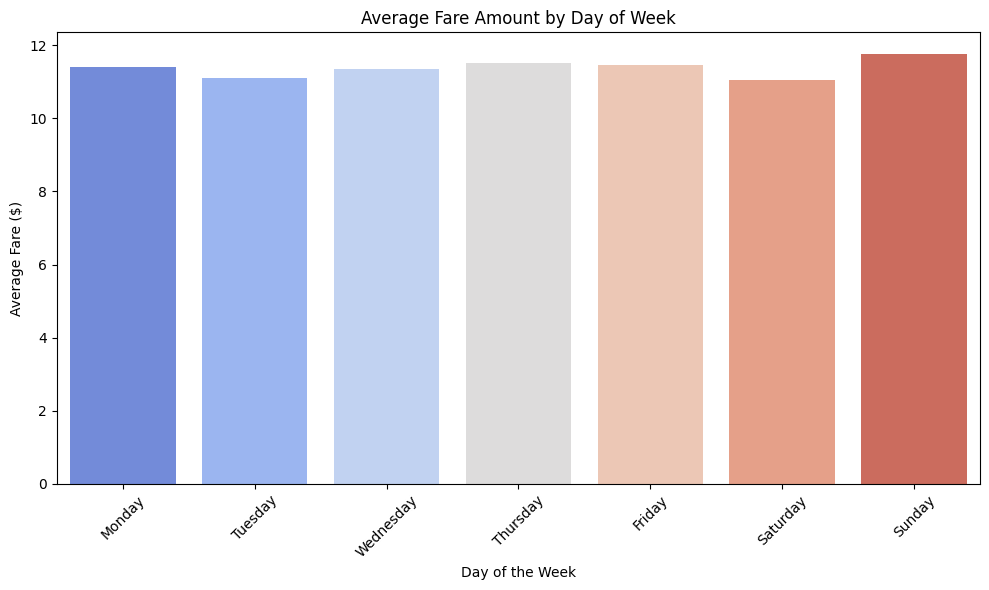

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values, palette='coolwarm')
plt.title('Average Fare Amount by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
